In [1]:
# Importing the required Libraries 

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Explore the dataset, identify trends and correlations, and present our findings through intuitive visualizations. 

In [2]:
# EDA

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)


In [3]:
# reading the first elements of the data set
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# Data Quality Check

# accuracy

# a) Survived
if(sum(data['Survived'].apply(str).str.isdigit()== False)==0):
   print('all Surived are only integers')
else:
   print('There Survived which are not')

# b) Age
if(sum(data['Age'].apply(str).str.isdigit()== False)==0):
   print('You have only integers')
else:
   print('There are  some Age which are not')
   df = data[~data['Age'].apply(str).str.isdigit() == True][['Sex','Age','Pclass']]
   print(df.head(10))

# a) Pclass

if(sum(data['Pclass'].apply(str).str.isdigit()== False)==0):
   if data['Pclass'].nunique() == 3:
      print('There are 3 unique values')
      print(data['Pclass'].unique())
      # Expected_Category = '1'+ '|'+ '2' +'|' + '3' 
      # if(sum(~data['Pclass'].str.contains(Expected_Category, na =False))==0):
      #    print('No othere apart from Expected category')
   else:
      print('There are more integers')
else:
   print('There Pclass which are not')



# check accuracy data 
if(sum(~data['Sex'].str.contains('Female|Male', na =False))==0):
   print('All values are correct')
else:
   print('There are some Gender values are not Male|female')

data.dtypes


all Surived are only integers
There are  some Age which are not
      Sex   Age  Pclass
0    male  22.0       3
1  female  38.0       1
2  female  26.0       3
3  female  35.0       1
4    male  35.0       3
5    male  28.0       3
6    male  54.0       1
7    male   2.0       3
8  female  27.0       3
9  female  14.0       2
There are 3 unique values
[3 1 2]
There are some Gender values are not Male|female


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Family_Size      int64
Is_Alone         int64
dtype: object

In [5]:
# Checking Missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing values 
try:

    data['Age'].fillna(data['Age'].median(), inplace=True)

    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    data.drop('Cabin', axis=1, inplace=True)

except:
    if data['Age'].isnull().sum() == 0:
        print('The Data Has been filled')

In [7]:
# Checking if there still exist a null value
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
# Feature Engneering finding an exra column

data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
data['Is_Alone'] = data['Family_Size'].apply(lambda x: 1 if x == 1 else 0)


/tmp/ipykernel_5321/293575280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age, bins = 20, kde = True, rug = False, norm_hist=False);


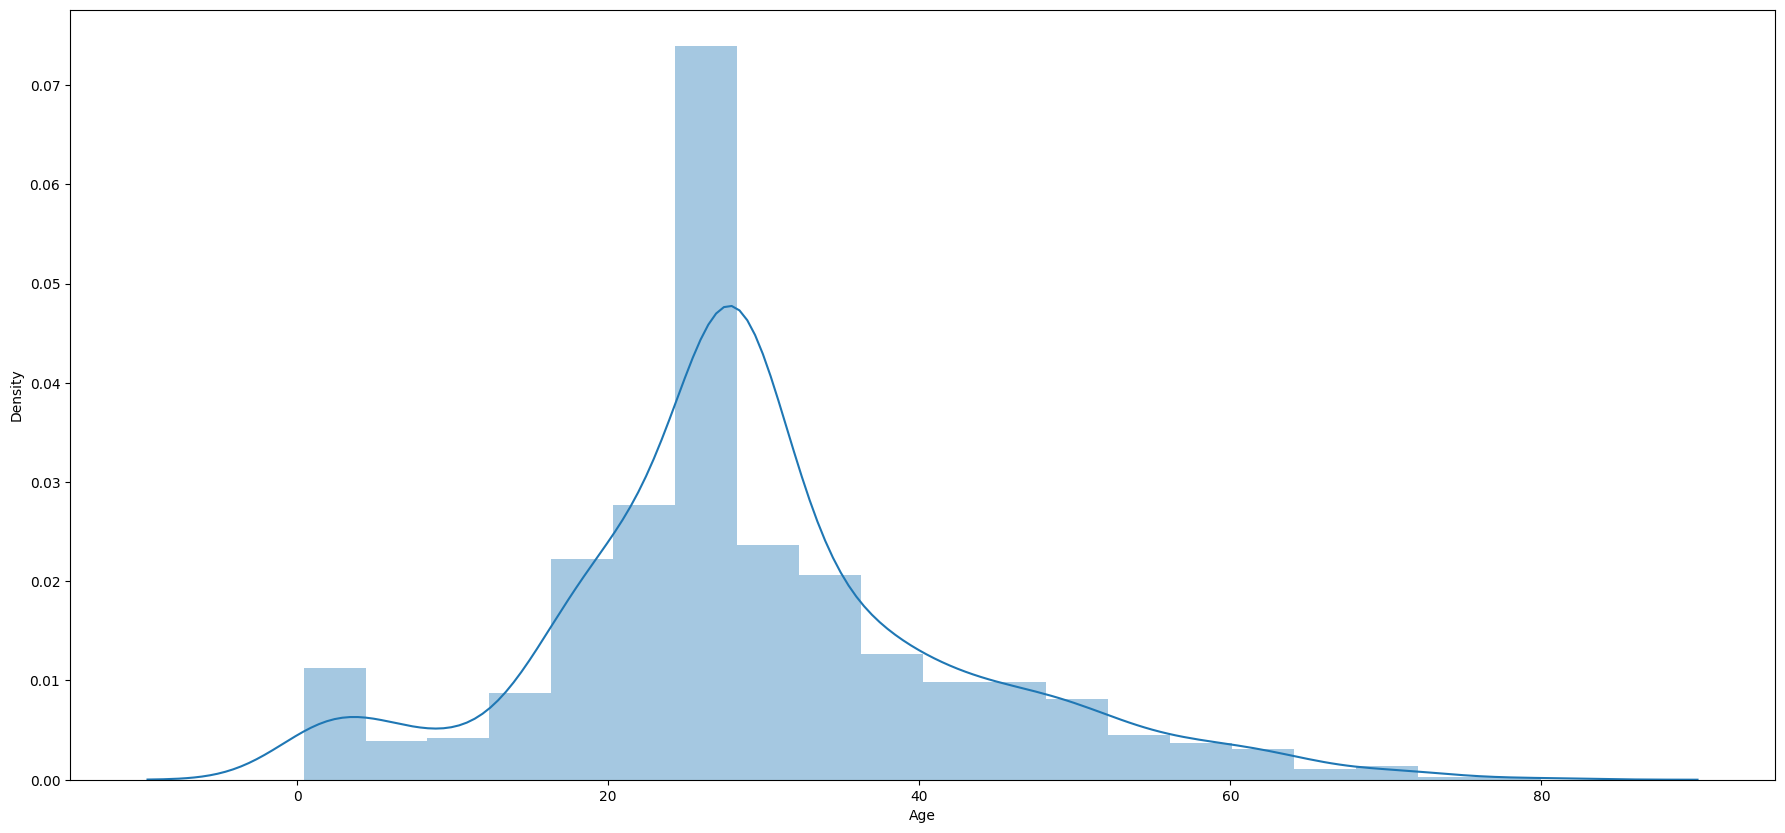

In [9]:
plt.subplots(figsize = (22,10),)
sns.distplot(data.Age, bins = 20, kde = True, rug = False, norm_hist=False);

plt.show()

In [10]:
gender_survival = data.groupby('Sex')['Survived'].mean().reset_index()
fig = px.histogram(gender_survival, x='Sex', y='Survived', title='Survival Rate by Gender')
fig.show()

In [11]:
pclass_survival = data.groupby('Pclass')['Survived'].mean().reset_index()
fig = px.bar(pclass_survival, x='Pclass', y='Survived', title='Survival Rate by Passenger Class')
fig.show()

In [12]:
fig = px.histogram(data, x='Age', nbins=10, title='Age Distribution of Passengers')
fig.show()

In [15]:
correlation_matrix = data.corr()



ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'